Dataset shape: (100000, 9)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

--- Missing Values ---
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dia

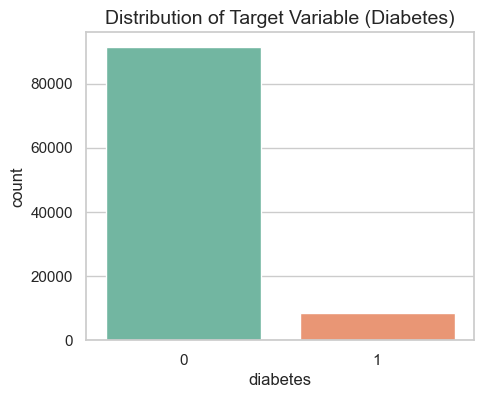

Diabetes ratio: 0.085


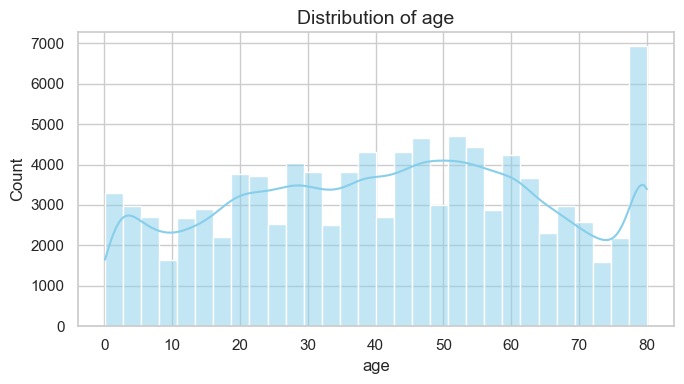

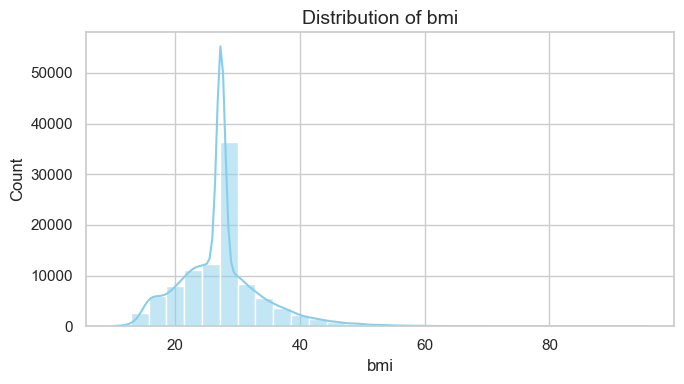

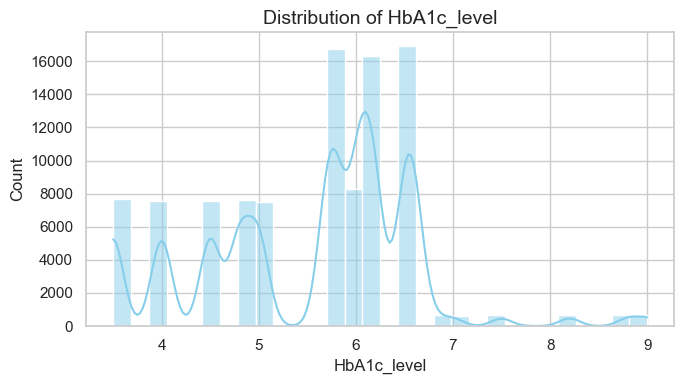

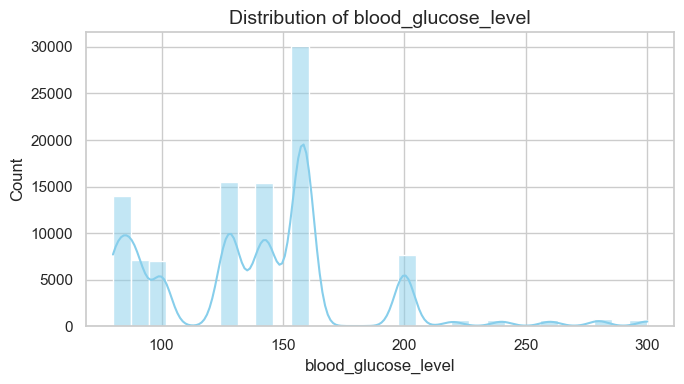

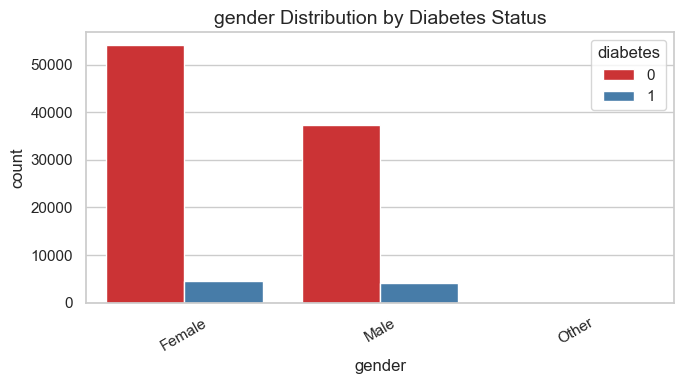

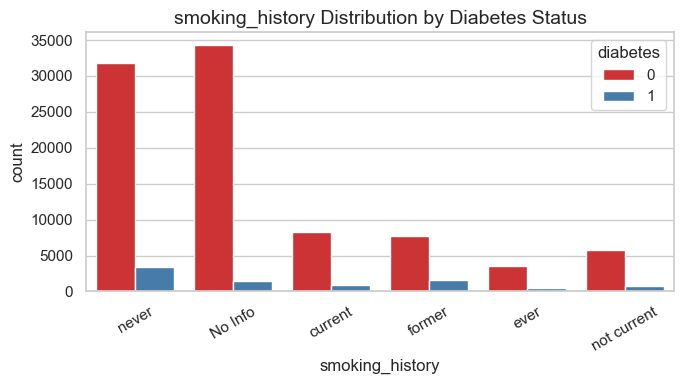

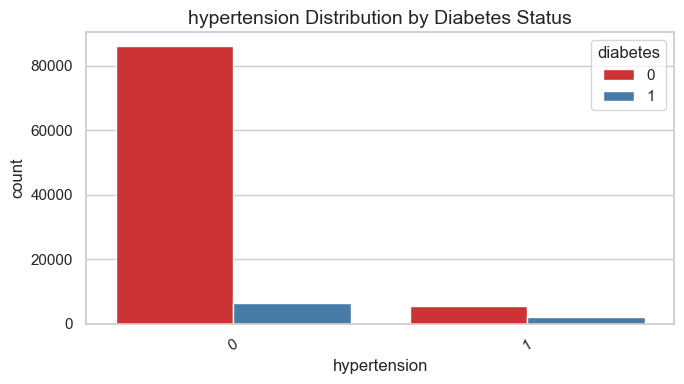

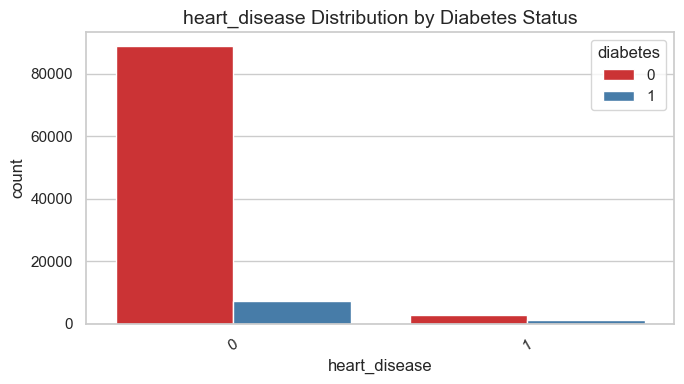

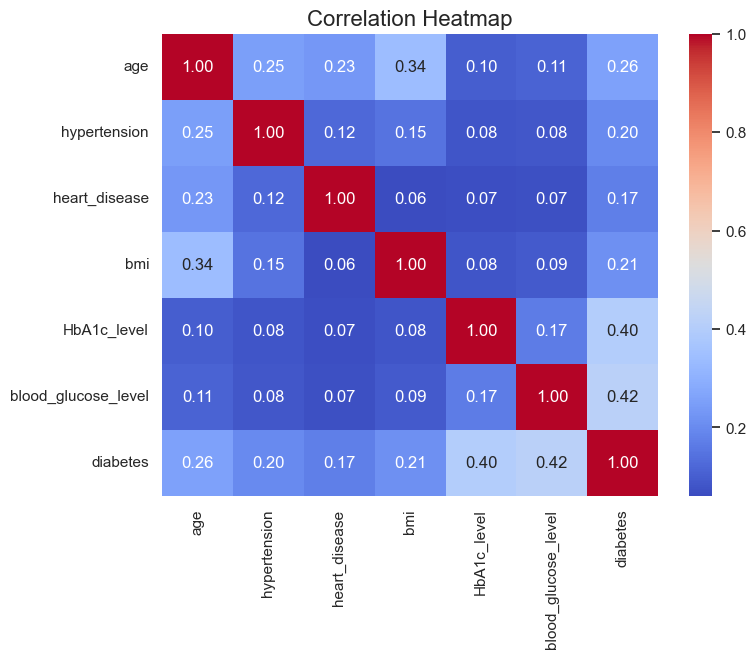

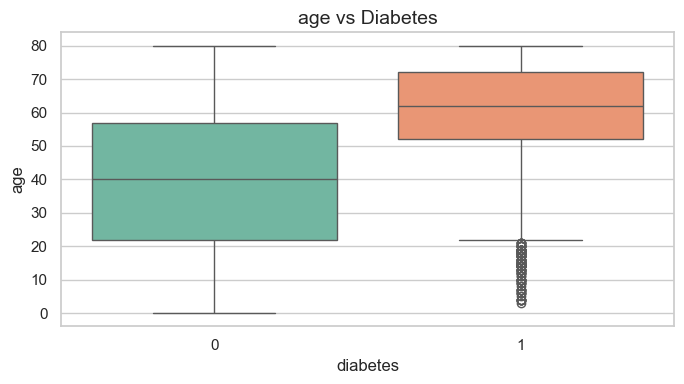

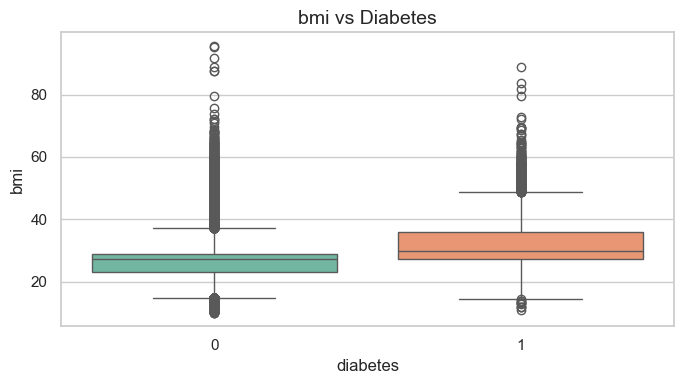

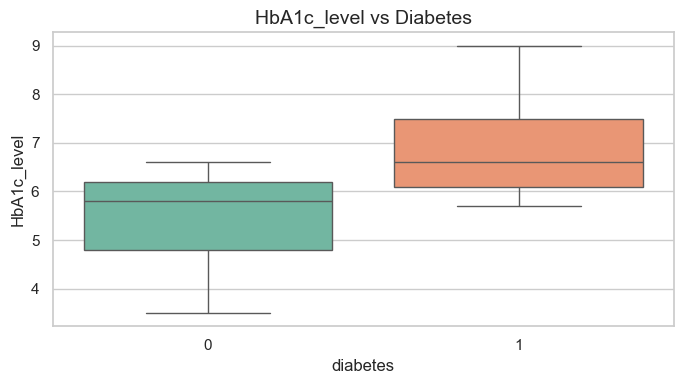

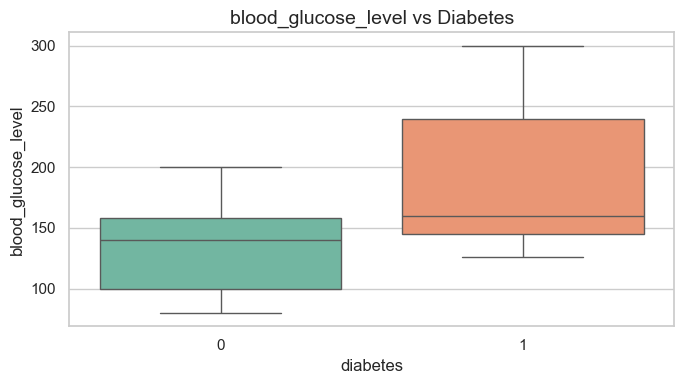


--- Summary Insights ---
Total rows: 100000
Features: 9
No missing values found 
Diabetes prevalence: 8.5 %

Strong predictors of diabetes: HbA1c_level, blood_glucose_level
Moderate predictors: age, BMI
Categorical influence: hypertension, heart_disease

Dataset is imbalanced (≈8.5% diabetics) → consider SMOTE or class weighting for modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


df = pd.read_csv("C:/Users/Administrator/Downloads/dataset/diabetes_prediction_dataset.csv")

print("Dataset shape:", df.shape)
df.head()


print("\n--- Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Descriptive Statistics ---")
print(df.describe())


plt.figure(figsize=(5,4))
sns.countplot(x="diabetes", hue="diabetes", data=df, palette="Set2", legend=False)
plt.title("Distribution of Target Variable (Diabetes)", fontsize=14)
plt.show()

print("Diabetes ratio:", df['diabetes'].mean())


numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in numeric_features:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


categorical_features = ['gender', 'smoking_history', 'hypertension', 'heart_disease']
for col in categorical_features:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, data=df, hue="diabetes", palette="Set1")
    plt.title(f'{col} Distribution by Diabetes Status', fontsize=14)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


for col in numeric_features:
    plt.figure(figsize=(7,4))
    sns.boxplot(x="diabetes", y=col, data=df, hue="diabetes", palette="Set2", legend=False)
    plt.title(f'{col} vs Diabetes', fontsize=14)
    plt.tight_layout()
    plt.show()


print("\n--- Summary Insights ---")
print(f"Total rows: {df.shape[0]}")
print(f"Features: {df.shape[1]}")
print("No missing values found ")
print("Diabetes prevalence:", round(df['diabetes'].mean()*100, 2), "%")

print("\nStrong predictors of diabetes: HbA1c_level, blood_glucose_level")
print("Moderate predictors: age, BMI")
print("Categorical influence: hypertension, heart_disease")
print("\nDataset is imbalanced (≈8.5% diabetics) → consider SMOTE or class weighting for modeling.")
